In [2]:
#importing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [3]:
#checking null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 1. Find out how many males and females participated in the test.

In [4]:
data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

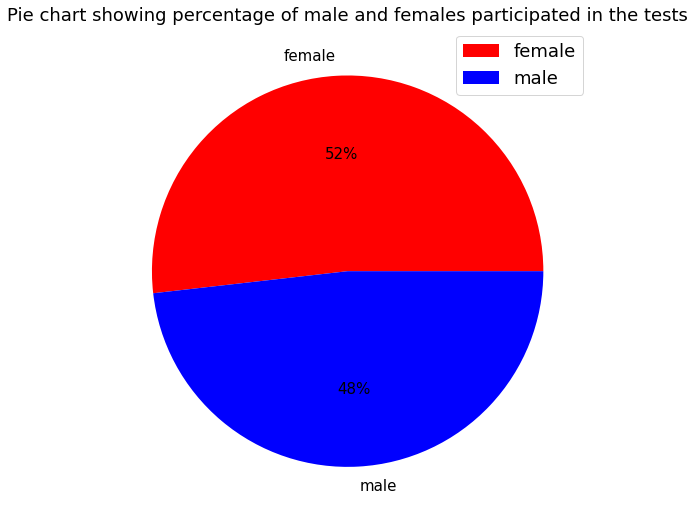

In [5]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(9,9))
plt.title("Pie chart showing percentage of male and females participated in the tests")
colors = ['red','blue']
plt.pie(data['gender'].value_counts(), labels = data['gender'].unique(), colors = colors, autopct='%.0f%%')
plt.legend(data['gender'].unique(),loc="upper right",fontsize='large')
plt.show()

# 2. What do you think about the students' parental level of education?

In [6]:
data["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

### 1. Majority of the parents have at least some college or associate's degree
### 2. 196 parents have only high school level education.
### 3. 59 parents are having a master's degree

# 3. Who scores the most on average for math, reading and writing based on
###                ●Gender

In [7]:
## calculating mean for each score
m1=np.mean(data['math score'])
m2=np.mean(data['reading score'])
m3=np.mean(data['writing score'])

In [8]:
data2=data[['math score','gender']][data['math score']>=m1].groupby("gender",as_index=False).count()
data2

,gender,math score
0,female,221
1,male,276


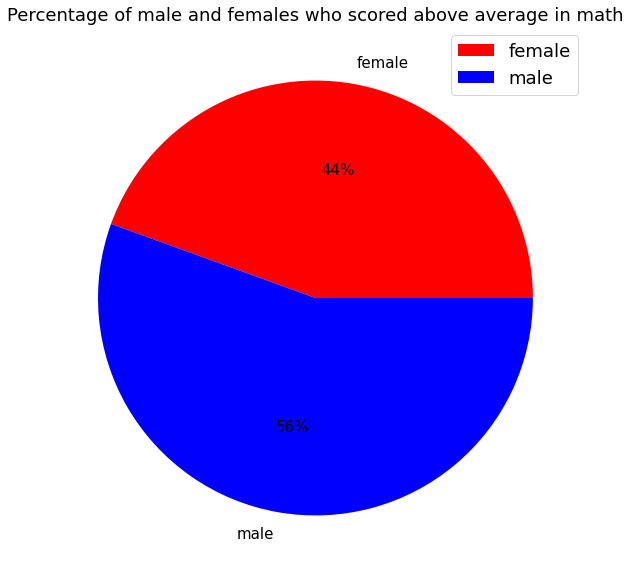

In [9]:
plt.figure(figsize=(10,10))
plt.title("Percentage of male and females who scored above average in math")
colors = ['red','blue']
plt.pie(data2['math score'], labels = data2['gender'].unique(), colors = colors, autopct='%.0f%%')
plt.legend(data2['gender'].unique(),loc="upper right",fontsize='large')
plt.show()

Male sudents scored higher than Female students

   gender  writing score
0  female            333
1    male            183
   gender  reading score
0  female            318
1    male            198


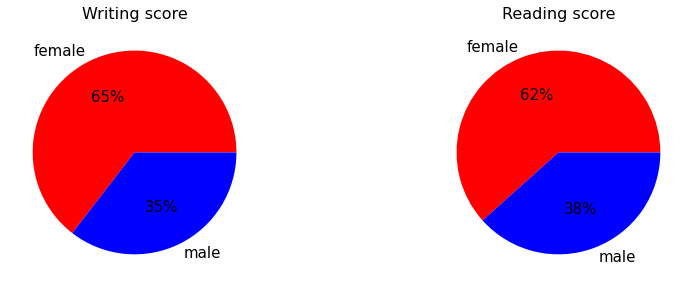

In [10]:
plt.figure(figsize=(12,8))
## first graph
data2=data[['gender','writing score']][data['writing score']>=m3].groupby("gender",as_index=False).count()
plt.subplot(2,2,1)## location of the graph, screen divided into a 2*1 matrix
plt.pie(data2['writing score'], labels = data2['gender'].unique(), colors = colors, autopct='%.0f%%')
plt.title("Writing score",fontsize=16)


## second graph
data3=data[['gender','reading score']][data['reading score']>=m2].groupby("gender",as_index=False).count()
plt.subplot(2,2,2)## location of the graph
plt.pie(data3['reading score'], labels = data3['gender'].unique(), colors = colors, autopct='%.0f%%')
plt.title("Reading score",fontsize=16)
plt.tight_layout()

print(data2)
print(data3)

Observation:

Female students have the highest average score in reading and writing tests whereas boys excelled in maths considering their average test scores

## ●Test preparation course

In [11]:
data2=data[['math score','test preparation course']][data['math score']>=m1].groupby("test preparation course",as_index=False).count()
data2

,test preparation course,math score
0,completed,216
1,none,281


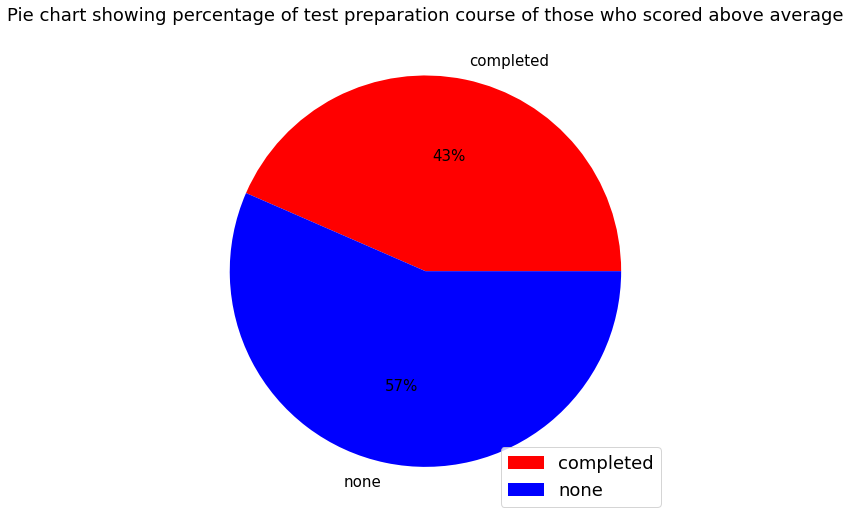

In [12]:
plt.figure(figsize=(9,9))
plt.title("Pie chart showing percentage of test preparation course of those who scored above average")
colors = ['red','blue']
plt.pie(data2['math score'], labels = data2['test preparation course'].unique(), colors = colors, autopct='%.0f%%')
plt.legend(data2['test preparation course'].unique(),loc="lower right",fontsize='large')
plt.show()

  test preparation course  writing score
0               completed            249
1                    none            267
  test preparation course  reading score
0               completed            238
1                    none            278


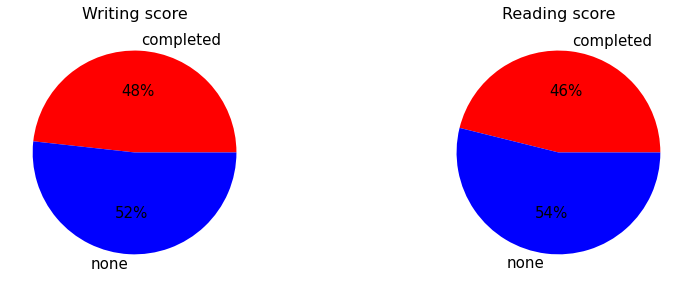

In [13]:
plt.figure(figsize=(12,8))

## first graph
data2=data[['test preparation course','writing score']][data['writing score']>=m3].groupby("test preparation course",as_index=False).count()
plt.subplot(2,2,1)## location of the graph, screen divided into a 2*1 matrix
plt.pie(data2['writing score'], labels = data2['test preparation course'].unique(), colors = colors, autopct='%.0f%%')
plt.title("Writing score",fontsize=16)


## second graph
data3=data[['test preparation course','reading score']][data['reading score']>=m2].groupby("test preparation course",as_index=False).count()
plt.subplot(2,2,2)## location of the graph
plt.pie(data3['reading score'], labels = data3['test preparation course'].unique(), colors = colors, autopct='%.0f%%')
plt.title("Reading score",fontsize=16)
plt.tight_layout()

print(data2)
print(data3)

Observation:

Those who have completed the test preparation course excelled in all the exams with better average scores than those who did'nt


# 4. What do you think about the scoring variation for math, reading and writing based on  
## ●Gender

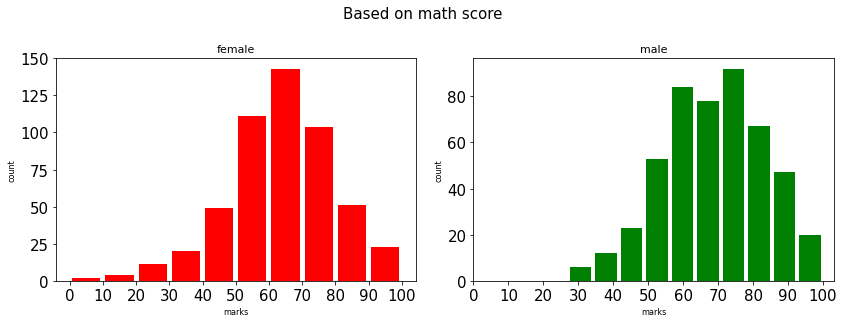

In [14]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on math score", size=15)
## first graph
plt.subplot(2,2,1)## location of the graph, screen divided into a 2*1 matrix
plt.hist(data['math score'][data["gender"]=='female'],color='red',rwidth=0.85,bins=10)
plt.title("female",fontsize=11)
plt.xlabel("marks",fontsize=8)
plt.ylabel("count",fontsize=8)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(data['math score'][data["gender"]=='male'],color='green',rwidth=0.85,bins=10)
plt.title("male",fontsize=11)
plt.xlabel("marks",fontsize=8)
plt.ylabel("count",fontsize=8)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)

Observations

Male students have better average scores in math test than females and the range of score variation is quite stable among boys

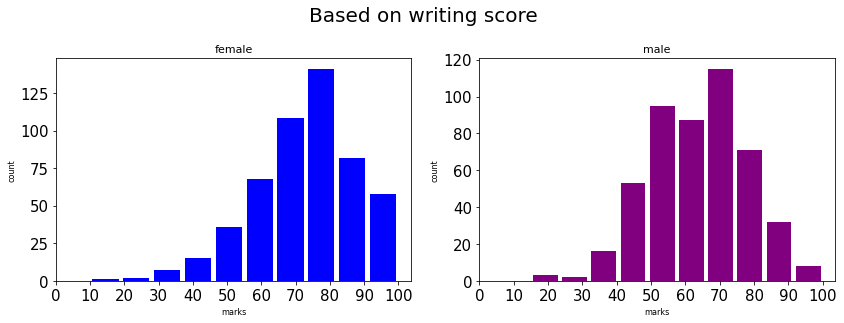

In [15]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on writing score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph
plt.hist(data['writing score'][data["gender"]=='female'],color='blue',rwidth=0.85,bins=10)
plt.title("female",fontsize=11)
plt.xlabel("marks",fontsize=8)
plt.ylabel("count",fontsize=8)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(data['writing score'][data["gender"]=='male'],color='purple',rwidth=0.85,bins=10)
plt.title("male",fontsize=11)
plt.xlabel("marks",fontsize=8)
plt.ylabel("count",fontsize=8)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.show()

Observations

Females has the highest average score in writing test; however this is due to some exteme scores

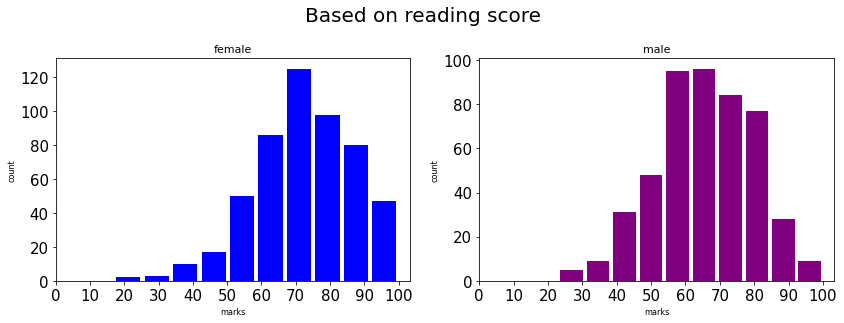

In [16]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on reading score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph
plt.hist(data['reading score'][data["gender"]=='female'],color='blue',rwidth=0.85,bins=10)
plt.title("female",fontsize=11)
plt.xlabel("marks",fontsize=8)
plt.ylabel("count",fontsize=8)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(data['reading score'][data["gender"]=='male'],color='purple',rwidth=0.85,bins=10)
plt.title("male",fontsize=11)
plt.xlabel("marks",fontsize=8)
plt.ylabel("count",fontsize=8)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.show()

Observations

Female students have the highest mean score in the reading test

## based on test preparation course 

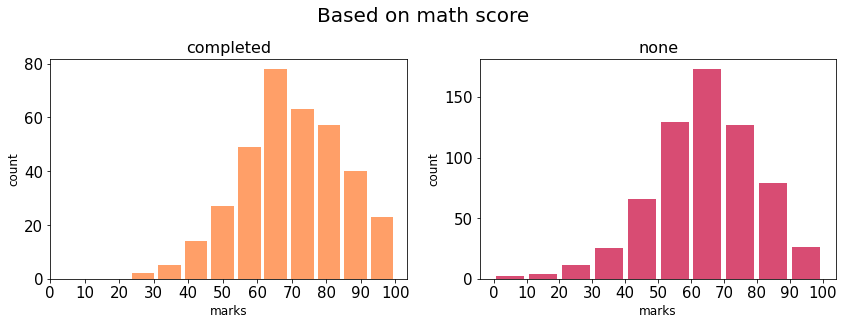

In [18]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on math score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph, screen divided into a 2*1 matrix
plt.hist(data['math score'][data["test preparation course"]=='completed'],color='#FF9F68',rwidth=0.85,bins=10)
plt.title("completed",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(data['math score'][data["test preparation course"]=='none'],color='#D84C73',rwidth=0.85,bins=10)
plt.title("none",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)

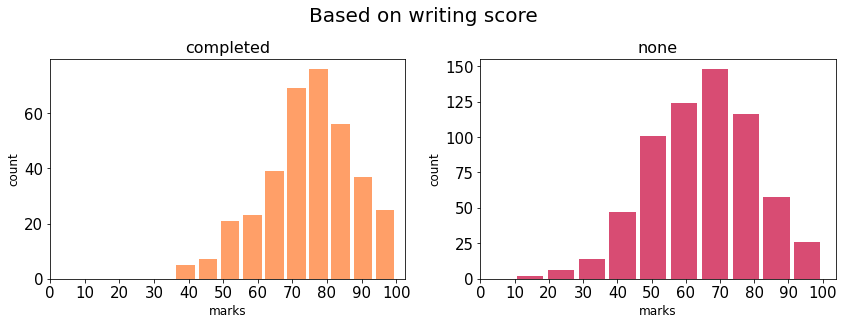

In [19]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on writing score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph
plt.hist(data['writing score'][data["test preparation course"]=='completed'],color='#FF9F68',rwidth=0.85,bins=10)
plt.title("completed",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(data['writing score'][data["test preparation course"]=='none'],color='#D84C73',rwidth=0.85,bins=10)
plt.title("none",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.show()


Observations

writing test scores of people who completed prep course is better than those who did'nt

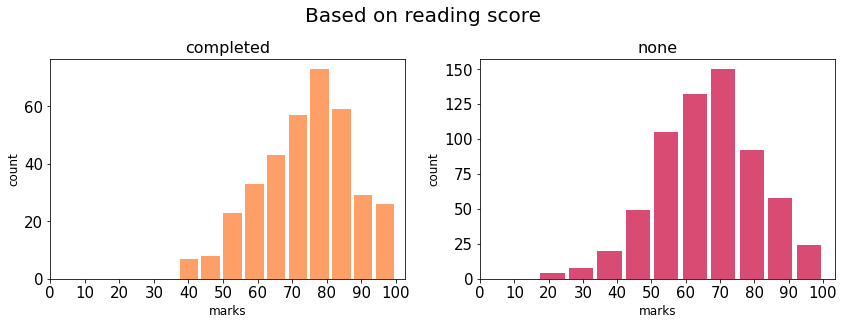

In [20]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on reading score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph
plt.hist(data['reading score'][data["test preparation course"]=='completed'],color='#FF9F68',rwidth=0.85,bins=10)
plt.title("completed",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(data['reading score'][data["test preparation course"]=='none'],color='#D84C73',rwidth=0.85,bins=10)
plt.title("none",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.show()


Observations

Those who took test prep.course completed performed well and there is better consistency in the scores of test prep. course completed students


# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this

In [13]:
mh=data.sort_values(['math score'],ascending=False)
mh.head(int(len(mh)*(25/100)))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73
